##  IMAGE CLASSIFICATION USING DEEP LEARNING

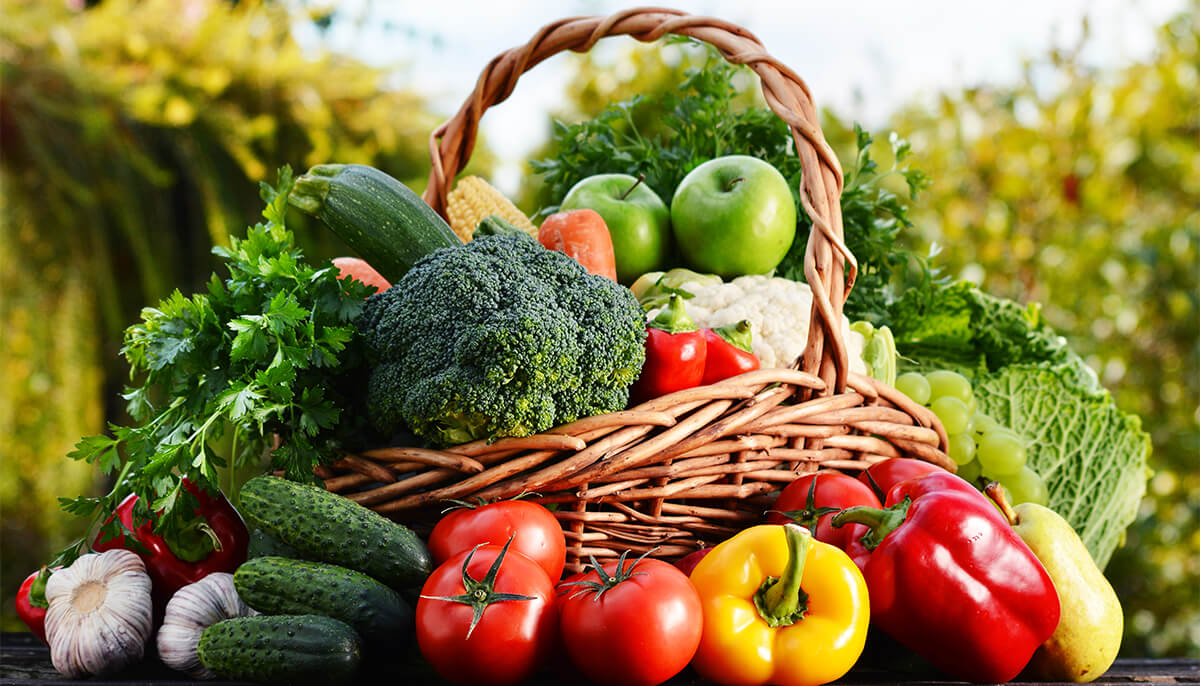

## Problem statement : 
### Vegetable classification using Deep learning

In recent years, the development model of agriculture  is changing from traditional agriculture to modern intelligent agriculture; the production of vegetables in agricultural products is also increasing. However, at present, vegetable picking, sorting and sales tasks still rely on manual completion, not only a large amount of labour force is consumed, but also the work efficiency is low, which seriously affecting the development of commercialization of vegetable products. 
An intelligent system should be built for classifying vegetables to improve work efficiency and reduce labour force.

### Source of the data : https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset

### Data description : 

This dataset contains three folders:

train - 15000 images

test - 3000 images

validation - 3000 images

There are 15 classes of vegetables :  bean, bitter gourd, bottle gourd, brinjal, broccoli, cabbage, capsicum, carrot, cauliflower, cucumber, papaya, potato, pumpkin, radish and tomato

### Importing relevant libraries : 

In [163]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop, SGD , Adagrad
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
import matplotlib.pyplot as plt
from keras.utils import plot_model , load_img
import cv2
from keras.models import Sequential
from keras.preprocessing import image

### Path for train , test and validation : 

In [2]:
train_dir = 'C:/Users/aravi/Vegetable Images/train/'
test_dir = 'C:/Users/aravi/Vegetable Images/test/'
validation_dir = 'C:/Users/aravi/Vegetable Images/validation/'

### A list of classes : 

In [170]:
classes = os.listdir(train_dir)

In [171]:
classes

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

### Displaying a sample from training set : 

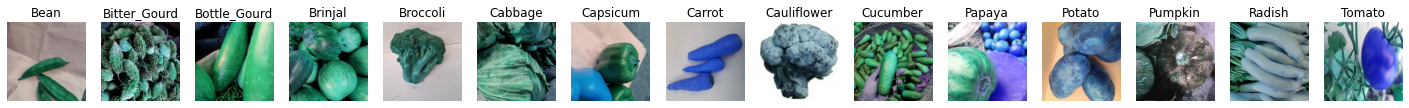

In [5]:
plt.figure(figsize=(25,25))
i = 1
for label in os.listdir(train_dir):
    img = cv2.imread(train_dir + label +'/'+ os.listdir(train_dir + label)[1])
    plt.subplot(1,15,i)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    i += 1
plt.show()

This is a sample display of images. One image from each class is displayed 

### Frequencies of train , test and validation set : 

In [6]:
def count_labels(path, set_):
    dict_freq = {}
    for label in os.listdir(path):
        dir_ = path + label
        dict_freq[label] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_freq, index=[set_])
    return df
train_count = count_labels(train_dir, 'Train frequency')
test_count = count_labels(test_dir, 'Test Frequency')
validation_count = count_labels(validation_dir, 'Validation Frequency')

In [7]:
print(train_count.T)

              Train frequency
Bean                     1000
Bitter_Gourd             1000
Bottle_Gourd             1000
Brinjal                  1000
Broccoli                 1000
Cabbage                  1000
Capsicum                 1000
Carrot                   1000
Cauliflower              1000
Cucumber                 1000
Papaya                   1000
Potato                   1000
Pumpkin                  1000
Radish                   1000
Tomato                   1000


In [8]:
print(test_count.T)

              Test Frequency
Bean                     200
Bitter_Gourd             200
Bottle_Gourd             200
Brinjal                  200
Broccoli                 200
Cabbage                  200
Capsicum                 200
Carrot                   200
Cauliflower              200
Cucumber                 200
Papaya                   200
Potato                   200
Pumpkin                  200
Radish                   200
Tomato                   200


In [9]:
print(validation_count.T)

              Validation Frequency
Bean                           200
Bitter_Gourd                   200
Bottle_Gourd                   200
Brinjal                        200
Broccoli                       200
Cabbage                        200
Capsicum                       200
Carrot                         200
Cauliflower                    200
Cucumber                       200
Papaya                         200
Potato                         200
Pumpkin                        200
Radish                         200
Tomato                         200


Train folder contains a total of 15,000 images evenly distributed among all the classes i.e 1,000 in each class.

Test folder and validation folder consists a total of 3,000 images evely distributed among all the classes i.e 200 in each class.

### Data Augmentation : 

### Rescaling the pixel values to lie between [ 0 , 1 ]  : 

In [11]:
data_gen = ImageDataGenerator(rescale = 1.0/255.0)

At hindsight,the zoom  in ,horizontal flip,vertical flip,horizontal shift and vertical shift features did not help to reduce the gap between training accuracy and validation accuracy. So they were removed and only rescaling the pixel values were done so that they can range between [0,1]. 

In [12]:
train_image_generator = data_gen.flow_from_directory(
                                            train_dir,
                                            target_size=(150, 150),
                                            batch_size=8,
                                            class_mode='categorical')

Found 15000 images belonging to 15 classes.


In [13]:
val_image_generator = data_gen.flow_from_directory(
                                            validation_dir,
                                            target_size=(150, 150),
                                            batch_size=8,
                                            class_mode='categorical')

Found 3000 images belonging to 15 classes.


In [14]:
test_image_generator = data_gen.flow_from_directory(
                                            test_dir,
                                            target_size=(150, 150),
                                            batch_size=8,
                                            class_mode='categorical')

Found 3000 images belonging to 15 classes.


### Class labels : 

In [172]:
labels = train_image_generator.class_indices

In [173]:
labels

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

### Model Selection : CNN 

#### A DIAGRAMATIC REPRESENTATION : 

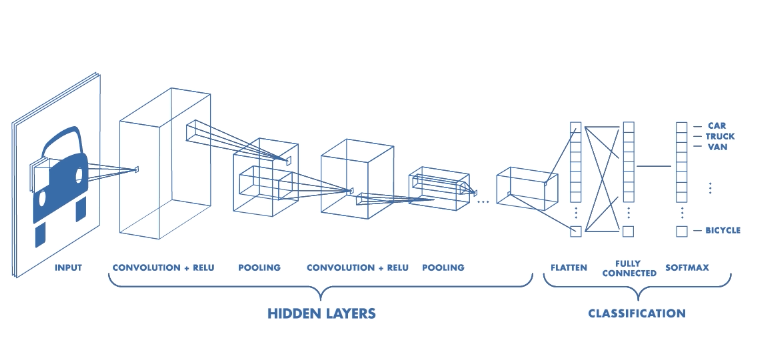

#### A SMALL DESCRIPTION : 

A CNN typically has three layers: a convolutional layer, a pooling layer, and a fully connected layer.

CONVOLUTIONAL LAYER : 

This layer performs a dot product between two matrices, where one matrix is the set of learnable parameters otherwise known as a kernel, and the other matrix is the restricted portion of the receptive field. 

POOLING LAYER : 

The pooling layer replaces the output of the network at certain locations by deriving a summary statistic of the nearby outputs. This helps in reducing the spatial size of the representation, which decreases the required amount of computation and weights. The pooling operation is processed on every slice of the representation individually.

FULLY CONNECTED LAYER : 

Neurons in this layer have full connectivity with all neurons in the preceding and succeeding layer.
The FC layer helps to map the representation between the input and the output.

### SGD optimizer : 

Initialize  $w_0 \in R^d$, and  sample a random index $\tilde i_t$ uniformly from $\{1, \ldots, n\}$ and then updating

$w_{t+1} = w_t - \alpha_t \cdot \nabla L_{\tilde i_t}(w_t)$

 $w_t$ - value of the parameter vector at time $t$
 
 $\alpha_t$ - learning rate or step size
 
 $\nabla f_i$  gradient of the  loss function of the $i$th training example.

#### CNN model :

In [50]:
model_sgd = Sequential()

model_sgd.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model_sgd.add(MaxPooling2D(2, ))
model_sgd.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model_sgd.add(MaxPooling2D(2))

model_sgd.add(Flatten())

model_sgd.add(Dense(128, activation='relu'))
model_sgd.add(Dropout(0.25))
model_sgd.add(Dense(128, activation='relu'))
model_sgd.add(Dense(15, activation='softmax'))

#### Compiling the model with SGD optimizer with learning rate 0.01 : 

In [51]:
model_sgd.compile(optimizer=SGD(learning_rate=0.01),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

#### Fitting : 

In [52]:
early_stopping = EarlyStopping(patience=7) 
hist_sgd = model_sgd.fit(train_image_generator, 
                 epochs=100, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping,batch_size = 1)

Epoch 1/100
468/468 [==============================] - 57s 120ms/step - loss: 2.4305 - accuracy: 0.1856 - val_loss: 2.0549 - val_accuracy: 0.2903
Epoch 2/100
468/468 [==============================] - 55s 118ms/step - loss: 1.8799 - accuracy: 0.3408 - val_loss: 1.6291 - val_accuracy: 0.4556
Epoch 3/100
468/468 [==============================] - 60s 129ms/step - loss: 1.5796 - accuracy: 0.4618 - val_loss: 1.3456 - val_accuracy: 0.5511
Epoch 4/100
468/468 [==============================] - 62s 132ms/step - loss: 1.3677 - accuracy: 0.5411 - val_loss: 1.1157 - val_accuracy: 0.6398
Epoch 5/100
468/468 [==============================] - 70s 150ms/step - loss: 1.1391 - accuracy: 0.6170 - val_loss: 0.9478 - val_accuracy: 0.6841
Epoch 6/100
468/468 [==============================] - 65s 139ms/step - loss: 1.0400 - accuracy: 0.6549 - val_loss: 0.7978 - val_accuracy: 0.7433
Epoch 7/100
468/468 [==============================] - 63s 134ms/step - loss: 0.8541 - accuracy: 0.7174 - val_loss: 0.6212 -

#### Loss curve : 

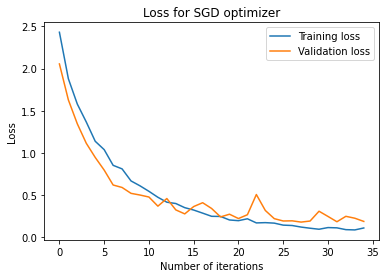

In [87]:
plt.plot(hist_sgd.history['loss'],label='Training loss')
plt.plot(hist_sgd.history['val_loss'],label='Validation loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss for SGD optimizer')
plt.legend()
plt.show()

#### Accuracy curve : 

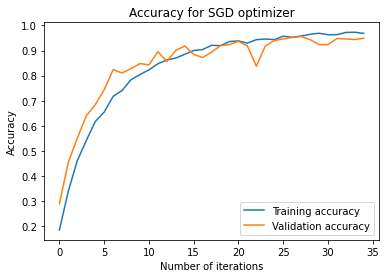

In [88]:
plt.plot(hist_sgd.history['accuracy'],label='Training accuracy')
plt.plot(hist_sgd.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy for SGD optimizer')
plt.legend()
plt.show()

### Evaluate on train data : 

In [103]:
sgd_train_loss, sgd_train_accuracy = model_sgd.evaluate(train_image_generator)
print(f'Train Loss = {sgd_train_loss:.2f}\n Train Accuracy = {sgd_train_accuracy*100:.2f}%')

1875/1875 [==============================] - 65s 35ms/step - loss: 0.0262 - accuracy: 0.9936
Train Loss = 0.03
 Train Accuracy = 99.36%


### Evaluate on test data : 

In [102]:
sgd_test_loss, sgd_test_accuracy = model_sgd.evaluate(test_image_generator)
print(f'Test Loss = {sgd_test_loss:.2f}\nTest Accuracy = {sgd_test_accuracy*100:.2f}%')

375/375 [==============================] - 11s 28ms/step - loss: 0.1774 - accuracy: 0.9510
Test Loss = 0.18
Test Accuracy = 95.10%


### Evaluate on validation data : 

In [104]:
sgd_val_loss, sgd_val_accuracy = model_sgd.evaluate(val_image_generator)
print(f'Val Loss = {sgd_val_loss:.2f}\nVal Accuracy = {sgd_val_accuracy*100:.2f}%')

375/375 [==============================] - 12s 32ms/step - loss: 0.1884 - accuracy: 0.9517
Val Loss = 0.19
Val Accuracy = 95.17%


- Vanilla SGD has accuracy of 95.1

- Loss of 0.18 on test samples 

- Loss curve shows that loss has propagated (decreasing). 

### Minibatching : 

To make all the rates smaller is by decreasing the value of $\sigma^2$ and this is done by minibatching. 

$$w_{t+1} = w_t - \alpha \cdot \frac{1}{B} \sum_{b=1}^B \nabla f_{i_{t,b}}(w_t) = w_t - \alpha \cdot \frac{1}{B} \sum_{b=1}^B \nabla_w \ell(w_t; x_{i_{t,b}}, y_{i_{t,b}}).$$

where $B$ is the *minibatch size* 

$i_{t,b}$ are $b$ random variables drawn independently and uniformly from $\{1,\ldots,n\}$ (where $n$ is the size of the training set).

#### CNN model : 

In [55]:
model_mini = Sequential()

model_mini.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model_mini.add(MaxPooling2D(2, ))
model_mini.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model_mini.add(MaxPooling2D(2))

model_mini.add(Flatten())

model_mini.add(Dense(128, activation='relu'))
model_mini.add(Dropout(0.25))
model_mini.add(Dense(128, activation='relu'))
model_mini.add(Dense(15, activation='softmax'))

#### Compiling the model : 

In [56]:
model_mini.compile(optimizer = SGD(learning_rate=0.01),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

### Fitting the model using batch size = 64

In [57]:
early_stopping = EarlyStopping(patience=7) 
hist_mini = model_mini.fit(train_image_generator, 
                 epochs=50, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping,batch_size = 64)

Epoch 1/50
468/468 [==============================] - 58s 123ms/step - loss: 2.5988 - accuracy: 0.1159 - val_loss: 2.3132 - val_accuracy: 0.1626
Epoch 2/50
468/468 [==============================] - 62s 132ms/step - loss: 2.0478 - accuracy: 0.2804 - val_loss: 1.7913 - val_accuracy: 0.3925
Epoch 3/50
468/468 [==============================] - 65s 139ms/step - loss: 1.6609 - accuracy: 0.4410 - val_loss: 1.4111 - val_accuracy: 0.5255
Epoch 4/50
468/468 [==============================] - 63s 134ms/step - loss: 1.3958 - accuracy: 0.5353 - val_loss: 1.3231 - val_accuracy: 0.5793
Epoch 5/50
468/468 [==============================] - 65s 139ms/step - loss: 1.1713 - accuracy: 0.6108 - val_loss: 1.2521 - val_accuracy: 0.6048
Epoch 6/50
468/468 [==============================] - 66s 141ms/step - loss: 1.0139 - accuracy: 0.6635 - val_loss: 0.8789 - val_accuracy: 0.7110
Epoch 7/50
468/468 [==============================] - 65s 139ms/step - loss: 0.8511 - accuracy: 0.7308 - val_loss: 0.7556 - val_ac

#### Loss curve:

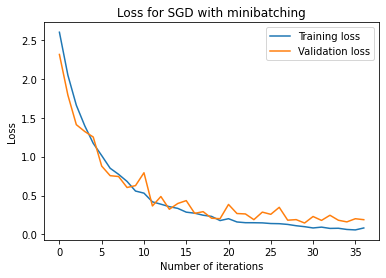

In [86]:
plt.plot(hist_mini.history['loss'],label='Training loss')
plt.plot(hist_mini.history['val_loss'],label='Validation loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss for SGD with minibatching')
plt.legend()
plt.show()

#### Accuracy curve : 

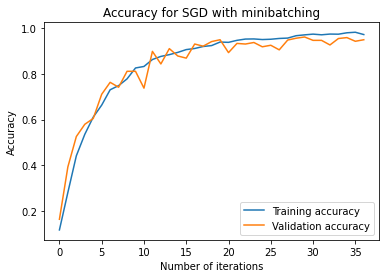

In [89]:
plt.plot(hist_mini.history['accuracy'],label='Training accuracy')
plt.plot(hist_mini.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy for SGD with minibatching')
plt.savefig('SGD_ACCUracy',facecolor='white')
plt.legend()
plt.show()

### Evaluate on train data : 

In [107]:
mini_train_loss, mini_train_accuracy = model_mini.evaluate(train_image_generator)
print(f'Train Loss = {mini_train_loss:.2f}\nTrain Accuracy = {mini_train_accuracy*100:.2f}%')

1875/1875 [==============================] - 61s 33ms/step - loss: 0.0223 - accuracy: 0.9935
Train Loss = 0.02
Train Accuracy = 99.35%


### Evaluate on test data : 

In [108]:
mini_test_loss, mini_test_accuracy = model_mini.evaluate(test_image_generator)
print(f'Test Loss = {mini_test_loss:.2f}\nTest Accuracy = {mini_test_accuracy*100:.2f}%')

375/375 [==============================] - 14s 37ms/step - loss: 0.1786 - accuracy: 0.9550
Test Loss = 0.18
Test Accuracy = 95.50%


### Evaluate on validation data : 

In [109]:
mini_val_loss, mini_val_accuracy = model_mini.evaluate(val_image_generator)
print(f'Val Loss = {mini_val_loss:.2f}\nVal Accuracy = {mini_val_accuracy*100:.2f}%')

375/375 [==============================] - 14s 38ms/step - loss: 0.1921 - accuracy: 0.9473
Val Loss = 0.19
Val Accuracy = 94.73%


- SGD with minibatching has an accuracy of 95.5% 

- And a loss of 0.18 on test samples!

- Loss is decreasing which is shown in loss curve!

### SGD with momentum : 

UPDATE RULE : 

\begin{align*}
  v_{t+1} &= \beta v_t - \alpha \nabla L_{\tilde i_t}(w_t) \\
  w_{t+1} &= w_t + v_{t+1}.
  \end{align*}


Here we use a moomentum parameter in the update rule

#### CNN model : 

In [60]:
model_mom = Sequential() 

model_mom.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model_mom.add(MaxPooling2D(2, ))
model_mom.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model_mom.add(MaxPooling2D(2))

model_mom.add(Flatten())

model_mom.add(Dense(128, activation='relu'))
model_mom.add(Dropout(0.25))
model_mom.add(Dense(128, activation='relu'))
model_mom.add(Dense(15, activation='softmax'))

#### Compiling the model including momentum : 

In [61]:
model_mom.compile(optimizer=SGD(learning_rate=0.01,momentum=0.9,nesterov = True),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

#### Fitting the model : 

In [62]:
early_stopping = EarlyStopping(patience=7) 
hist_mom = model_mom.fit(train_image_generator, 
                 epochs=50, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

Epoch 1/50
468/468 [==============================] - 62s 131ms/step - loss: 2.3889 - accuracy: 0.1736 - val_loss: 2.0282 - val_accuracy: 0.2728
Epoch 2/50
468/468 [==============================] - 62s 133ms/step - loss: 2.0447 - accuracy: 0.2754 - val_loss: 1.7971 - val_accuracy: 0.3280
Epoch 3/50
468/468 [==============================] - 60s 129ms/step - loss: 1.8989 - accuracy: 0.3352 - val_loss: 1.6579 - val_accuracy: 0.4355
Epoch 4/50
468/468 [==============================] - 61s 130ms/step - loss: 1.8483 - accuracy: 0.3456 - val_loss: 1.6900 - val_accuracy: 0.3992
Epoch 5/50
468/468 [==============================] - 61s 131ms/step - loss: 1.7942 - accuracy: 0.3793 - val_loss: 1.5708 - val_accuracy: 0.4435
Epoch 6/50
468/468 [==============================] - 63s 135ms/step - loss: 1.7200 - accuracy: 0.4231 - val_loss: 1.7683 - val_accuracy: 0.4180
Epoch 7/50
468/468 [==============================] - 62s 132ms/step - loss: 1.6855 - accuracy: 0.4343 - val_loss: 1.6401 - val_ac

#### Loss curve : 

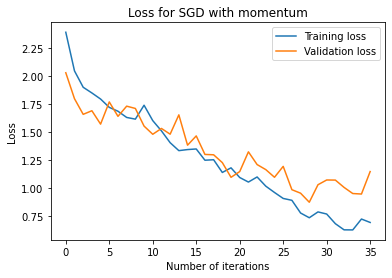

In [90]:
plt.plot(hist_mom.history['loss'],label='Training loss')
plt.plot(hist_mom.history['val_loss'],label='Validation loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss for SGD with momentum')
plt.legend()
plt.show()

#### Accuracy curve : 

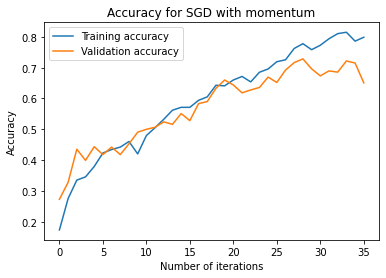

In [91]:
plt.plot(hist_mom.history['accuracy'],label='Training accuracy')
plt.plot(hist_mom.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy for SGD with momentum')
plt.legend()
plt.show()

### Evaluate on train data : 

In [110]:
mom_train_loss, mom_train_accuracy = model_mom.evaluate(train_image_generator)
print(f'Train Loss = {mom_train_loss:.2f}\nTrain Accuracy = {mom_train_accuracy*100:.2f}%')

1875/1875 [==============================] - 60s 32ms/step - loss: 0.6115 - accuracy: 0.8313
Train Loss = 0.61
Train Accuracy = 83.13%


### Evaluate on test data : 

In [111]:
mom_test_loss, mom_test_accuracy = model_mom.evaluate(test_image_generator)
print(f'Test Loss = {mom_test_loss:.2f}\nTest Accuracy = {mom_test_accuracy*100:.2f}%')

375/375 [==============================] - 13s 35ms/step - loss: 1.1873 - accuracy: 0.6500
Test Loss = 1.19
Test Accuracy = 65.00%


### Evaluate on validation data: 

In [112]:
mom_val_loss, mom_val_accuracy = model_mom.evaluate(val_image_generator)
print(f'Val Loss = {mom_val_loss:.2f}\nVal Accuracy = {mom_val_accuracy*100:.2f}%')

375/375 [==============================] - 10s 28ms/step - loss: 1.1476 - accuracy: 0.6610
Val Loss = 1.15
Val Accuracy = 66.10%


- SGD with momentum has an accuracy of 65% 

- And a loss of 1.19 for test sample!

- Loss has a decreasing trend overall!

### RMS Prop optimizer : 

#### INPUT : 

Global learning rate factor -  $\alpha$

Decay rate - $\rho$ 
       
Initial parameters $w \in R^d$.

#### ALGORITHM : 

* Initialize $r \leftarrow 0 \in R^d$

* *loop*
  * select a minibatch $\mathcal{B}$ of size $B$
  * compute the stochastic gradient $g \leftarrow \frac{1}{B} \sum_{i \in \mathcal{B}} \nabla f_i(w)$
  * accumulate second moment estimate $r_j \leftarrow \rho r_j + (1 - \rho) g_j^2$ for all $j \in \{1, \ldots, d \}$
  * update model $w_j \rightarrow w_j - \frac{\alpha}{\sqrt{r_j}} \cdot g_j$ for all $j \in \{1, \ldots, d \}$

#### CNN model : 

In [65]:
model_rms = Sequential()

model_rms.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model_rms.add(MaxPooling2D(2, ))
model_rms.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model_rms.add(MaxPooling2D(2))

model_rms.add(Flatten())

model_rms.add(Dense(128, activation='relu'))
model_rms.add(Dropout(0.25))
model_rms.add(Dense(128, activation='relu'))
model_rms.add(Dense(15, activation='softmax'))

#### Compiling the model with rmsprop optimizer : 

In [66]:
model_rms.compile(optimizer = RMSprop(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

#### Fitting the model : 

In [67]:
early_stopping = EarlyStopping(patience=7) 
hist_rms = model_rms.fit(train_image_generator, 
                 epochs=50, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

Epoch 1/50
468/468 [==============================] - 80s 169ms/step - loss: 1.8322 - accuracy: 0.4044 - val_loss: 1.0895 - val_accuracy: 0.6546
Epoch 2/50
468/468 [==============================] - 75s 160ms/step - loss: 1.1436 - accuracy: 0.6477 - val_loss: 0.7472 - val_accuracy: 0.7473
Epoch 3/50
468/468 [==============================] - 75s 161ms/step - loss: 0.8221 - accuracy: 0.7468 - val_loss: 1.0608 - val_accuracy: 0.7137
Epoch 4/50
468/468 [==============================] - 76s 162ms/step - loss: 0.7055 - accuracy: 0.7898 - val_loss: 0.4860 - val_accuracy: 0.8602
Epoch 5/50
468/468 [==============================] - 75s 161ms/step - loss: 0.6267 - accuracy: 0.8224 - val_loss: 0.6332 - val_accuracy: 0.8105
Epoch 6/50
468/468 [==============================] - 75s 160ms/step - loss: 0.5113 - accuracy: 0.8568 - val_loss: 0.6969 - val_accuracy: 0.7970
Epoch 7/50
468/468 [==============================] - 76s 162ms/step - loss: 0.4854 - accuracy: 0.8632 - val_loss: 0.5451 - val_ac

#### Loss curve :

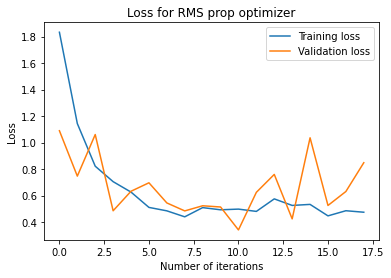

In [92]:
plt.plot(hist_rms.history['loss'],label='Training loss')
plt.plot(hist_rms.history['val_loss'],label='Validation loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss for RMS prop optimizer')
plt.legend()
plt.show()

#### Accuracy curve : 

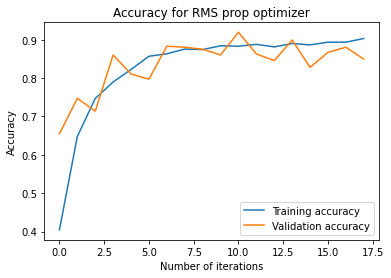

In [93]:
plt.plot(hist_rms.history['accuracy'],label='Training accuracy')
plt.plot(hist_rms.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy for RMS prop optimizer')
plt.legend()
plt.show()

### Evaluate on train data : 

In [113]:
rms_train_loss, rms_train_accuracy = model_rms.evaluate(train_image_generator)
print(f'Train Loss = {rms_train_loss:.2f}\nTrain Accuracy = {rms_train_accuracy*100:.2f}%')

1875/1875 [==============================] - 60s 32ms/step - loss: 0.4224 - accuracy: 0.9143
Train Loss = 0.42
Train Accuracy = 91.43%


### Evaluate on test data : 

In [114]:
rms_test_loss, rms_test_accuracy = model_rms.evaluate(test_image_generator)
print(f'Test Loss = {rms_test_loss:.2f}\nTest Accuracy = {rms_test_accuracy*100:.2f}%')

375/375 [==============================] - 12s 33ms/step - loss: 0.7808 - accuracy: 0.8637
Test Loss = 0.78
Test Accuracy = 86.37%


### Evaluate on validation data : 

In [115]:
rms_val_loss, rms_val_accuracy = model_rms.evaluate(val_image_generator)
print(f'Val Loss = {rms_val_loss:.2f}\nVal Accuracy = {rms_val_accuracy*100:.2f}%')

375/375 [==============================] - 11s 28ms/step - loss: 0.8904 - accuracy: 0.8600
Val Loss = 0.89
Val Accuracy = 86.00%


- RMS prop optimizer produces an accuracy of 86.37% 

- And a loss of 0.78

- The loss curve has fluctuations and the accuracy curve shows overall increase!

### Adagrad optimizer : 

#### INPUT : 

Global learning rate factor - $\alpha$

Initial parameters - $w \in R^d$.

#### ALGORITHM : 

* Initialize $r \leftarrow 0 \in R^d$

* *loop*
  - select a minibatch $\mathcal{B}$ of size $B$
  - compute the stochastic gradient $g \leftarrow \frac{1}{B} \sum_{i \in \mathcal{B}} \nabla f_i(w)$
  - accumulate second moment estimate $r_j \leftarrow r_j + g_j^2$ for all $j \in \{1, \ldots, d \}$
  - update model $w_j \leftarrow w_j - \frac{\alpha}{\sqrt{r_j}} \cdot g_j$ for all $j \in \{1, \ldots, d \}$

#### CNN model : 

In [70]:
model_adag = Sequential()

model_adag.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model_adag.add(MaxPooling2D(2, ))
model_adag.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model_adag.add(MaxPooling2D(2))

model_adag.add(Flatten())

model_adag.add(Dense(128, activation='relu'))
model_adag.add(Dropout(0.25))
model_adag.add(Dense(128, activation='relu'))
model_adag.add(Dense(15, activation='softmax'))

#### Compiling the model : 

In [71]:
model_adag.compile(optimizer=Adagrad(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

#### Fitting the model : 

In [72]:
early_stopping = EarlyStopping(patience=7) 
hist_adag = model_adag.fit(train_image_generator, 
                 epochs=50, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

Epoch 1/50
468/468 [==============================] - 64s 136ms/step - loss: 2.6607 - accuracy: 0.1082 - val_loss: 2.5295 - val_accuracy: 0.1707
Epoch 2/50
468/468 [==============================] - 64s 136ms/step - loss: 2.4286 - accuracy: 0.1907 - val_loss: 2.1778 - val_accuracy: 0.2634
Epoch 3/50
468/468 [==============================] - 66s 142ms/step - loss: 2.1742 - accuracy: 0.2807 - val_loss: 2.0046 - val_accuracy: 0.3548
Epoch 4/50
468/468 [==============================] - 69s 148ms/step - loss: 2.0137 - accuracy: 0.3317 - val_loss: 1.7892 - val_accuracy: 0.4046
Epoch 5/50
468/468 [==============================] - 73s 156ms/step - loss: 1.8498 - accuracy: 0.3846 - val_loss: 1.7223 - val_accuracy: 0.4731
Epoch 6/50
468/468 [==============================] - 65s 139ms/step - loss: 1.7514 - accuracy: 0.4183 - val_loss: 1.5432 - val_accuracy: 0.5202
Epoch 7/50
468/468 [==============================] - 68s 145ms/step - loss: 1.6529 - accuracy: 0.4610 - val_loss: 1.5021 - val_ac

#### Loss curve : 

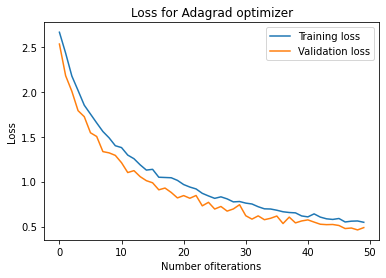

In [94]:
plt.plot(hist_adag.history['loss'],label='Training loss')
plt.plot(hist_adag.history['val_loss'],label='Validation loss')
plt.xlabel('Number ofiterations')
plt.ylabel('Loss')
plt.title('Loss for Adagrad optimizer')
plt.legend()
plt.show()

#### Accuracy curve : 

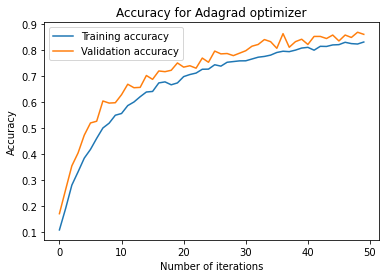

In [95]:
plt.plot(hist_adag.history['accuracy'],label='Training accuracy')
plt.plot(hist_adag.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy for Adagrad optimizer')
plt.legend()
plt.show()

### Evaluate on train data : 

In [116]:
adag_train_loss, adag_train_accuracy = model_adag.evaluate(train_image_generator)
print(f'Train Loss = {adag_train_loss:.2f}\nTrain Accuracy = {adag_train_accuracy*100:.2f}%')

1875/1875 [==============================] - 59s 31ms/step - loss: 0.3986 - accuracy: 0.8907
Train Loss = 0.40
Train Accuracy = 89.07%


### Evaluate on test data : 

In [117]:
adag_test_loss, adag_test_accuracy = model_adag.evaluate(test_image_generator)
print(f'Test Loss = {adag_test_loss:.2f}\nTest Accuracy = {adag_test_accuracy*100:.2f}%')

375/375 [==============================] - 12s 33ms/step - loss: 0.4928 - accuracy: 0.8543
Test Loss = 0.49
Test Accuracy = 85.43%


### Evaluate on validation data : 

In [118]:
adag_val_loss, adag_val_accuracy = model_adag.evaluate(val_image_generator)
print(f'Val Loss = {adag_val_loss:.2f}\nVal Accuracy = {adag_val_accuracy*100:.2f}%')

375/375 [==============================] - 11s 29ms/step - loss: 0.4949 - accuracy: 0.8570
Val Loss = 0.49
Val Accuracy = 85.70%


- Adagrad optimizer produces an accuracy of 85.43% on test sample

- And a loss of 0.49 

- The loss curves shows a decreasing trend and accuracy shows an increasing trend!

### Adam optimizer : 

#### INPUT : 

Global learning rate factor - $\alpha$ 

Decay rates - $\rho_1$ & $\rho_2$ 

Initial parameters $w \in R^d$.

#### ALGORITHM : 

* Initialize $r \leftarrow 0 \in R^d$
* Initialize timestep $t \leftarrow 0$

* **loop**
  * update timestep $t \leftarrow t + 1$
  * select a minibatch $\mathcal{B}$ of size $B$
  * compute the stochastic gradient $g \leftarrow \frac{1}{B} \sum_{i \in \mathcal{B}} \nabla f_i(w)$
  * accumulate first moment estimate $s_j \leftarrow \rho_1 s_j + (1 - \rho_1) g_j$ for all $j \in \{1, \ldots, d \}$
  * accumulate second moment estimate $r_j \leftarrow \rho_2 r_j + (1 - \rho_2) g_j^2$ for all $j \in \{1, \ldots, d \}$
  * correct first moment bias $\hat s \leftarrow \frac{s}{1 - \rho_1^t}$ 
  * correct second moment bias $\hat r \leftarrow \frac{r}{1 - \rho_2^t}$
  * update model $w_j \rightarrow w_j - \frac{\alpha}{\sqrt{\hat r_j}} \cdot \hat s_j$ for all $j \in \{1, \ldots, d \}$

#### CNN model : 

In [75]:
model_adam = Sequential()

model_adam.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model_adam.add(MaxPooling2D(2, ))
model_adam.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model_adam.add(MaxPooling2D(2))

model_adam.add(Flatten())

model_adam.add(Dense(128, activation='relu'))
model_adam.add(Dropout(0.25))
model_adam.add(Dense(128, activation='relu'))
model_adam.add(Dense(15, activation='softmax'))

#### Compiling the model : 

In [76]:
model_adam.compile(optimizer=Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

#### Fitting the model : 

In [77]:
early_stopping = EarlyStopping(patience=7) 
hist_adam = model_adam.fit(train_image_generator, 
                 epochs=50, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

Epoch 1/50
468/468 [==============================] - 63s 134ms/step - loss: 2.0687 - accuracy: 0.3162 - val_loss: 1.6398 - val_accuracy: 0.4489
Epoch 2/50
468/468 [==============================] - 62s 133ms/step - loss: 1.2736 - accuracy: 0.5769 - val_loss: 0.9368 - val_accuracy: 0.7083
Epoch 3/50
468/468 [==============================] - 62s 133ms/step - loss: 0.9758 - accuracy: 0.6891 - val_loss: 0.8579 - val_accuracy: 0.7339
Epoch 4/50
468/468 [==============================] - 62s 132ms/step - loss: 0.7680 - accuracy: 0.7471 - val_loss: 0.7195 - val_accuracy: 0.7621
Epoch 5/50
468/468 [==============================] - 63s 135ms/step - loss: 0.6191 - accuracy: 0.8088 - val_loss: 0.6307 - val_accuracy: 0.8024
Epoch 6/50
468/468 [==============================] - 62s 133ms/step - loss: 0.5448 - accuracy: 0.8261 - val_loss: 0.4607 - val_accuracy: 0.8629
Epoch 7/50
468/468 [==============================] - 62s 133ms/step - loss: 0.4310 - accuracy: 0.8622 - val_loss: 0.4724 - val_ac

#### Loss curve :

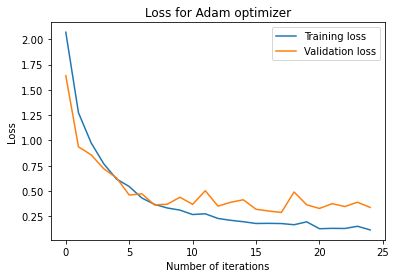

In [97]:
plt.plot(hist_adam.history['loss'],label='Training loss')
plt.plot(hist_adam.history['val_loss'],label='Validation loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss for Adam optimizer')
plt.legend()
plt.show()

#### Accuracy curve : 

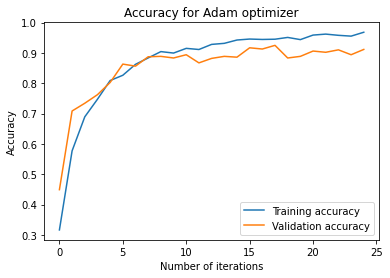

In [98]:
plt.plot(hist_adam.history['accuracy'],label='Training accuracy')
plt.plot(hist_adam.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy for Adam optimizer')
plt.legend()
plt.show()

### Evaluate on train data : 

In [119]:
adam_train_loss, adam_train_accuracy = model_adam.evaluate(train_image_generator)
print(f'Train Loss = {adam_train_loss:.2f}\nTrain Accuracy = {adam_train_accuracy*100:.2f}%')

1875/1875 [==============================] - 61s 32ms/step - loss: 0.0323 - accuracy: 0.9911
Train Loss = 0.03
Train Accuracy = 99.11%


### Evaluate on test data : 

In [120]:
adam_test_loss, adam_test_accuracy = model_adam.evaluate(test_image_generator)
print(f'Test Loss = {adam_test_loss:.2f}\nTest Accuracy = {adam_test_accuracy*100:.2f}%')

375/375 [==============================] - 10s 27ms/step - loss: 0.3099 - accuracy: 0.9153
Test Loss = 0.31
Test Accuracy = 91.53%


### Evaluate on validation data : 

In [121]:
adam_val_loss, adam_val_accuracy = model_adam.evaluate(val_image_generator)
print(f'Val Loss = {adam_val_loss:.2f}\nVal Accuracy = {adam_val_accuracy*100:.2f}%')

375/375 [==============================] - 10s 28ms/step - loss: 0.3520 - accuracy: 0.9077
Val Loss = 0.35
Val Accuracy = 90.77%


- Adam optimizer produces an accuracy of 91.53% 

- And a loss of 0.31 

- The loss curve has decreasing trend and accuracy curve has an increasing trend!

### Train accuracy and loss for various optimizers : 

In [122]:
train_acc_list = [sgd_train_accuracy,mini_train_accuracy,mom_train_accuracy,rms_train_accuracy,adag_train_accuracy,adam_train_accuracy]

In [286]:
train_acc_list = [x*100 for x in train_acc_list]

In [123]:
train_loss_list = [sgd_train_loss,mini_train_loss,mom_train_loss,rms_train_loss,adag_train_loss,adam_train_loss]

In [127]:
list_opt = ['SGD_vanilla','SGD_minibatching','SGD_momentum','RMS_prop','Adagrad','Adam']

In [289]:
train_acc_df = pd.DataFrame(train_acc_list,index = list_opt , columns = ['Train accuracy'])

In [290]:
train_acc_df

,Train accuracy
SGD_vanilla,99.360001
SGD_minibatching,99.353331
SGD_momentum,83.126664
RMS_prop,91.433334
Adagrad,89.066666
Adam,99.106669


In [138]:
train_loss_df = pd.DataFrame(train_loss_list, index = list_opt , columns = ['Train Loss'])

In [139]:
train_loss_df

,Train Loss
SGD_vanilla,0.026217
SGD_minibatching,0.022308
SGD_momentum,0.611490
RMS_prop,0.422389
Adagrad,0.398585
Adam,0.032292


### Test accuracy and loss for various optimizers : 

In [140]:
test_acc_list = [sgd_test_accuracy,mini_test_accuracy,mom_test_accuracy,rms_test_accuracy,adag_test_accuracy,adam_test_accuracy]

In [288]:
test_acc_list = [x*100 for x in test_acc_list]

In [141]:
test_loss_list = [sgd_test_loss,mini_test_loss,mom_test_loss,rms_test_loss,adag_test_loss,adam_test_loss]`

In [291]:
test_acc_df = pd.DataFrame(test_acc_list , index = list_opt , columns = ['Test Accuracy'])

In [143]:
test_loss_df = pd.DataFrame(test_loss_list , index = list_opt , columns = ['Test Loss'])

In [292]:
test_acc_df

,Test Accuracy
SGD_vanilla,95.099998
SGD_minibatching,95.499998
SGD_momentum,64.999998
RMS_prop,86.366665
Adagrad,85.433334
Adam,91.533333


In [145]:
test_loss_df

,Test Loss
SGD_vanilla,0.177360
SGD_minibatching,0.178638
SGD_momentum,1.187348
RMS_prop,0.780782
Adagrad,0.492802
Adam,0.309928


### Validation accuracy and loss for various optimizers : 

In [146]:
val_acc_list = [sgd_val_accuracy,mini_val_accuracy,mom_val_accuracy,rms_val_accuracy,adag_val_accuracy,adam_val_accuracy]

In [293]:
val_acc_list = [x*100 for x in val_acc_list]

In [147]:
val_loss_list = [sgd_val_loss,mini_val_loss,mom_val_loss,rms_val_loss,adag_val_loss,adam_val_loss]

In [294]:
val_acc_df = pd.DataFrame(val_acc_list , index = list_opt , columns = ['Validation Accuracy'])

In [149]:
val_loss_df = pd.DataFrame(val_loss_list , index = list_opt , columns = ['Validation Loss'])

In [295]:
val_acc_df

,Validation Accuracy
SGD_vanilla,95.166665
SGD_minibatching,94.733334
SGD_momentum,66.100001
RMS_prop,86.000001
Adagrad,85.699999
Adam,90.766668


In [151]:
val_loss_df

,Validation Loss
SGD_vanilla,0.188421
SGD_minibatching,0.192102
SGD_momentum,1.147568
RMS_prop,0.890429
Adagrad,0.494852
Adam,0.352016


#### TRAIN ,TEST AND VALIDATION ACCURACY PUT TOGETHER  :

In [296]:
total_df_acc = pd.DataFrame(index = list_opt)

In [297]:
total_df_acc['Train Accuracy'] = train_acc_list
total_df_acc['Test Accuracy'] = test_acc_list
total_df_acc['Validation Accuracy'] = val_acc_list

In [298]:
total_df_acc

,Train Accuracy,Test Accuracy,Validation Accuracy
SGD_vanilla,99.360001,95.099998,95.166665
SGD_minibatching,99.353331,95.499998,94.733334
SGD_momentum,83.126664,64.999998,66.100001
RMS_prop,91.433334,86.366665,86.000001
Adagrad,89.066666,85.433334,85.699999
Adam,99.106669,91.533333,90.766668


#### THE MAXIMUM AND MINIMUM TRAINING ACCURACY : 

In [311]:
print(total_df_acc['Train Accuracy'].min(axis=0))
print(total_df_acc['Train Accuracy'].max(axis=0))

83.12666416168213
99.36000108718872


- Clearly we can see that vanilla SGD is better than any model to learn the training examples.

- SGD with momentum is the worst of all in learning the training examples. 

#### THE MAXIMUM AND MINIMUM TESTING ACCURACY : 

In [312]:
print(total_df_acc['Test Accuracy'].min(axis=0))
print(total_df_acc['Test Accuracy'].max(axis=0))

64.99999761581421
95.49999833106995


- Clearly we can see that SGD with minibatching gives the best accuracy for test samples. 

- SGD with momentum gives the worst accuracy for test samples. 

#### THE MAXIMUM AND MINIMUM VALIDATION ACCURACY : 

In [314]:
print(total_df_acc['Validation Accuracy'].min(axis=0))
print(total_df_acc['Validation Accuracy'].max(axis=0))

66.10000133514404
95.16666531562805


- Clearly we can see that vanilla SGD is produces the best result for validation samples.

- SGD with momentum produces the worst accuracy for validation samples

INFERENCE : 

In comparison vanilla SGD has produced better results overall and SGD with momentum has produced the worst results as far as accuracy is concern

#### TRAIN , TEST AND VALIDATION LOSS PUT TOGETHER : 

In [306]:
total_df_loss = pd.DataFrame(index = list_opt)

In [307]:
total_df_loss['Train Loss'] = train_loss_list
total_df_loss['Test Loss'] = test_loss_list
total_df_loss['Validation Loss'] = val_loss_list

In [308]:
total_df_loss

,Train Loss,Test Loss,Validation Loss
SGD_vanilla,0.026217,0.177360,0.188421
SGD_minibatching,0.022308,0.178638,0.192102
SGD_momentum,0.611490,1.187348,1.147568
RMS_prop,0.422389,0.780782,0.890429
Adagrad,0.398585,0.492802,0.494852
Adam,0.032292,0.309928,0.352016


In [317]:
print(total_df_loss['Train Loss'].min(axis=0))
print(total_df_loss['Train Loss'].max(axis=0))

0.02230798825621605
0.6114902496337891


- SGD with minibatching has incurred minimum loss in training sample. 

- SGD with momentum has incurred maximum loss in training sample!

In [318]:
print(total_df_loss['Test Loss'].min(axis=0))
print(total_df_loss['Test Loss'].max(axis=0))

0.17736046016216278
1.1873478889465332


- Vanilla SGD has incurred minimum loss in testing sample.

- SGD with momentum has incurred maximum loss in testing sample.

In [320]:
print(total_df_loss['Validation Loss'].min(axis=0))
print(total_df_loss['Validation Loss'].max(axis=0))

0.18842104077339172
1.1475675106048584


- Vanilla SGD has incurred minimum loss in validation sample.

- SGD with momentum has incurred maximum loss in validation sample. 

INFERENCE : 

Vanilla SGD has produced the best results in comparison to other optimizers.

SGD with momentum has produced the worst results in comparison to other optimizers.

### Comparison of validation accuracy curves: 

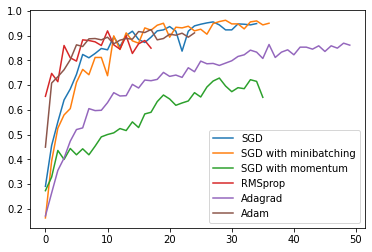

In [325]:
plt.plot(hist_sgd.history['val_accuracy'],label='SGD')
plt.plot(hist_mini.history['val_accuracy'],label='SGD with minibatching')
plt.plot(hist_mom.history['val_accuracy'],label='SGD with momentum')
plt.plot(hist_rms.history['val_accuracy'],label='RMSprop')
plt.plot(hist_adag.history['val_accuracy'],label='Adagrad')
plt.plot(hist_adam.history['val_accuracy'],label='Adam')
plt.legend()
plt.show()

- Clearly Vanilla SGD and SGD with minibatching show better accuracy for validation data among the optimizers!

- SGD with momentum shows the worst accuracy!

### Comparison of validation loss curves : 

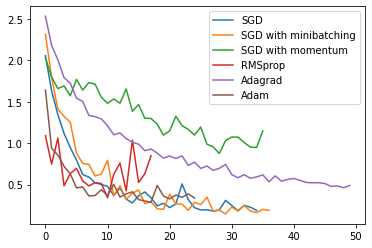

In [326]:
plt.plot(hist_sgd.history['val_loss'],label='SGD')
plt.plot(hist_mini.history['val_loss'],label='SGD with minibatching')
plt.plot(hist_mom.history['val_loss'],label='SGD with momentum')
plt.plot(hist_rms.history['val_loss'],label='RMSprop')
plt.plot(hist_adag.history['val_loss'],label='Adagrad')
plt.plot(hist_adam.history['val_loss'],label='Adam')
plt.legend()
plt.show()

- Clearly Vanilla SGD and SGD with minibatching show minimum loss.

- SGD with momentum shows maximum loss!

### Prediction : 

In [267]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [253]:
# A RANDOM IMAGE IS TAKEN : 
img_path = 'C:/Users/aravi/Vegetable Images/test/Bean/0001.jpg'

In [268]:
img = image.load_img(img_path, target_size=(150, 150))

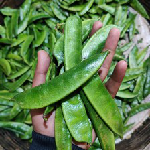

In [269]:
img

#### Image is converted to array and a batch is created :  

In [270]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

#### Preprocessing : Rescaling is done (normalization)

In [271]:
img_preprocessed = preprocess_input(img_batch)

#### Different models are used to predict : 

In [272]:
### USING VANILLA SGD
pred_1 = model_sgd.predict(img_preprocessed); pred_1

1/1 [==============================] - 0s 47ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [273]:
### USING SGD WITH MINIBATCHING
pred_2 = model_mini.predict(img_preprocessed); pred_2

1/1 [==============================] - 0s 68ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [274]:
### USING SGD WITH MOMENTUM
pred_3 = model_mom.predict(img_preprocessed); pred_3

1/1 [==============================] - 0s 40ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [275]:
### USING RMS PROP OPTIMIZER
pred_4 = model_rms.predict(img_preprocessed); pred_4

1/1 [==============================] - 0s 44ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [276]:
### USING ADAGRAD
pred_5 = model_adag.predict(img_preprocessed); pred_5

1/1 [==============================] - 0s 43ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [277]:
### USING ADAM
pred_6 = model_adam.predict(img_preprocessed); pred_6

1/1 [==============================] - 0s 43ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

- The output of prediction is produced as one-hot encoding list